In [1]:
from quanttools import CandlestickTimesSeries 
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('data/Binance_BTCUSDT_d.csv', skiprows=1, parse_dates=True, index_col=0).dropna()
df= df.rename(columns={'Volume USDT':'volume'})
df = df.sort_values('date')
df = df.where(pd.notnull(df), None)

In [19]:
c = CandlestickTimesSeries(df)

In [20]:
c.df.set_index('date', inplace=True)

In [21]:
c.add_candlestick_features()

<AxesSubplot:xlabel='date'>

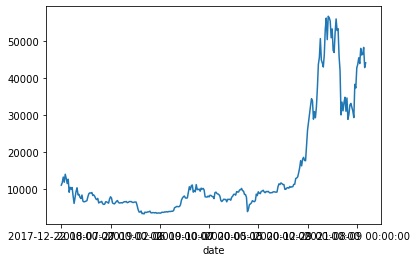

In [25]:
c[c['min_o1']]['low'].plot()

In [37]:
from statsmodels.tsa.api import ETSModel, seasonal_decompose

In [40]:
seasonal_decompose(c['close'], model='additive', freq='M')

<ipython-input-40-3708f6afeb93>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(c['close'], model='additive', freq='M')


TypeError: '<' not supported between instances of 'int' and 'str'

In [47]:
es = ETSModel(c['close'])

C:\Users\javad\.conda\envs\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='date'>

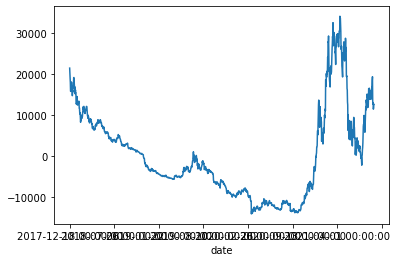

In [50]:
detrend(c['close']).plot()

<AxesSubplot:xlabel='date'>

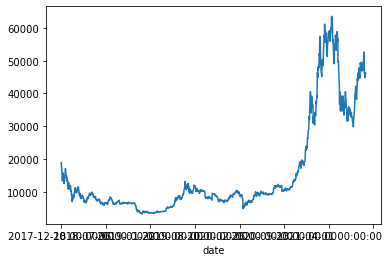

In [51]:
c['close'].plot()